<a href="https://colab.research.google.com/github/datacalf39/datacalf/blob/master/Capstone_1_Data_Analysis_Avocado_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Introduction 
Over the last few years, avocado toast and well, avocados in general have been an obsession among many. Though there are many species of avocados, the Hass avocado is undoubtedly the most popular and the represental the classic visual of the avocado with its bumpy dark green skin. The Hass avocado was first grown by horticulturalist Rudolph Hass in Southern California and now accounts for 80 percent of the avocado crop in the United States and 95 percent of avocado crop in California. Since the Hass avocado is the most grown avocado crop in the United States, I thought it would be interesting to look further into the prices of the Hass avocado and the volumes sold in major cities across the country. 

# 2. Hypothesis 
-I hypothesize that there will be no significant difference between the average price of organic and conventional avocados across the country 
-I hypothesize that there will be a greater amount of conventional avocados sold per day than organic avocados 
-I hypothesize that a greater number of small bags of organic avocados will be sold per day than large bags of organic avocados
-I hypothesize that a greater number of large bags of conventional avocados will be sold per day than small bags of conventional avocados 

# 3. Data
The dataset I have was taken from Kaggle and given by the vendor "Justin Kiggins" who is a product manager at the Chan Zuckerberg Initiative in Redwood City California. The data set was originally given to the vendor by the Hass Avocado Board. The data has 18249 rows and 13 columns. The columns of most importance that I will be focusing on are "Average Price", "Total Volume" , and "Type". The dataset examines characteristics of Hass Avocado sales and production from 3rd Janurary 2015 to March 24th 2018. 

In [ ]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [ ]:
avocado_data = pd.read_csv('https://raw.githubusercontent.com/datacalf39/File-Uploads-/master/avocado.csv')

In [ ]:
avocado_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
avocado_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
avocado_data.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [ ]:
# Dropping regions from dataset so that the dataset only includes major cities 
#removal_list =[ 'Total US', 'California', 'SouthCarolina', 'West', 'NorthernNewEngland', 'Southeast', 'WestTexNewMexico', 'Midsouth'] 

#indexNames = avocado_data[(avocado_data['region'] == 'TotalUS') ].index

#avocado_data.drop(indexNames , inplace=True)

#indexNames_2 = avocado_data[(avocado_data['region'] == 'California')].index

#avocado_data.drop(indexNames_2 , inplace=True)

#indexNames_3 = avocado_data[(avocado_data['region'] == 'SouthCarolina')].index

#avocado_data.drop(indexNames_3 , inplace=True)

#indexNames_4 = avocado_data[(avocado_data['region'] == 'West')].index

#avocado_data.drop(indexNames_4 , inplace=True)

#indexNames_5 = avocado_data[(avocado_data['region'] == 'NorthernNewEngland')].index

#avocado_data.drop(indexNames_5 , inplace=True)

#indexNames_6 = avocado_data[(avocado_data['region'] == 'Southeast')].index

#avocado_data.drop(indexNames_6 , inplace=True)

#indexNames_7 = avocado_data[(avocado_data['region'] == 'WestTexNewMexico')].index

#avocado_data.drop(indexNames_7 , inplace=True)

#indexNames_8 = avocado_data[(avocado_data['region'] == 'Midsouth')].index

#avocado_data.drop(indexNames_8 , inplace=True)

In [ ]:
removal_list =[ 'Total US', 'California', 'SouthCarolina', 'West', 'NorthernNewEngland', 'Southeast', 'WestTexNewMexico', 'Midsouth'] 

indexNames_8 = avocado_data[(avocado_data['region'].isin(removal_list))].index

avocado_data.drop(indexNames_8 , inplace=True)



In [ ]:
#Checking for proper removal of regions 
avocado_data.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'Charlotte', 'Chicago', 'CincinnatiDayton',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Nashville',
       'NewOrleansMobile', 'NewYork', 'Northeast', 'Orlando',
       'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'Sacramento', 'SanDiego', 'SanFrancisco', 'Seattle',
       'SouthCentral', 'Spokane', 'StLouis', 'Syracuse', 'Tampa',
       'TotalUS'], dtype=object)

In [ ]:
#Renaming "Total Volume" column to "Number Sold Per Day" so it makes more sense as to what it is referring to 
avocado_data.rename(columns = {'Total Volume':'Number Sold Per Day'}, inplace = True) 

#4. Methods
Here I created different dataframes for my four histogram plots. Intially I removed all rows that had "TotalUS", "California" and "SouthCarolina" as regions because those represented states and the country whereas the other regions in the dataset were cities. First, I separated organic from conventional data from the initial dataset so that I could compare the average prices for my first histogram. I then used then used those separated datasets to them compare the total number of organic avocados sold per day to the total number of conventional avocados sold per day in my second histogram. For this histogram, I took the log values of the total numbers for both organic and conventional data for easier plotting because their values were so high. For my third histogram, I made new dataframes that separated the organic avocado data frame so that one dataframe contained information about the small bags being sold and the other had information about the large bags being sold. I then took a log of those numbers for my histogram for easier plotting since their values were so large. For my fourth histogram, I did the same thing as I did with my third histogram except instead of doing that with the organic avocado data, I used the conventional avocado data again to compare the number of small bags sold with the number of large bags sold. 

In [ ]:
#Overview of the entire dataset 
avocado_data.head()

,Unnamed: 0,Date,AveragePrice,Number Sold Per Day,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
#Function for 95 confidence interval test for later use
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")


In [ ]:
#Removing all the organic avocado from the intial dataframe so that it shows data from just the conventional avocados
conventional_data = avocado_data.loc[(avocado_data['type']== 'conventional')]
#Sectioning the conventional avocado data so it just shows average price and the type
section_conventional_data = conventional_data[[ 'AveragePrice', 'type']]

In [ ]:
#Removing all the conventional avocado from the intial dataframe so that it shows data from just the organic avocados
organic_data = avocado_data.loc[(avocado_data['type']== 'organic')]
#Sectioning the organic avocado data so it just shows average price and the type
section_organic_data = organic_data[[ 'AveragePrice', 'type']]

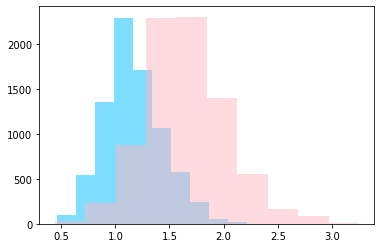

DescribeResult(nobs=7943, minmax=(0.46, 2.22), mean=1.1664862142767216, variance=0.0712825271015441, skewness=0.44736748330760195, kurtosis=0.14099699255826303)
DescribeResult(nobs=7943, minmax=(0.44, 3.25), mean=1.655166813546519, variance=0.14066818861395755, skewness=0.40919978615096275, kurtosis=0.6621576849922799)


In [ ]:
#Plotting the average price of conventional avocados and organic avocados and assessing for normality
plt.hist(section_conventional_data['AveragePrice'], alpha = .5,color='deepskyblue')
plt.hist(section_organic_data['AveragePrice'], alpha = .5,color='lightpink')
plt.show()

print(stats.describe(section_conventional_data['AveragePrice']))
print(stats.describe(section_organic_data['AveragePrice']))

In [ ]:
#Since data is normally distributed, using t test to check for significance 
print(stats.ttest_ind(section_conventional_data['AveragePrice'],section_organic_data['AveragePrice']))

Ttest_indResult(statistic=-94.6019166440729, pvalue=0.0)


In [ ]:
#95% confidence interval test and means of each variable
print(get_95_ci(section_conventional_data['AveragePrice'], section_conventional_data['AveragePrice']))


print(section_conventional_data['AveragePrice'].mean())
print(section_organic_data['AveragePrice'].mean())

The difference in means at the 95% confidence interval (two-tail) is between -0.008303674789529722 and 0.008303674789529722.
1.16648621427672
1.6551668135465167


In [ ]:
#Number Sold Per Day Values are high so taking the log of those values for better plots 
organic_data['Log of Number Sold Per Day']=np.log(organic_data['Number Sold Per Day'])

conventional_data['Log of Number Sold Per Day']=np.log(conventional_data['Number Sold Per Day'])

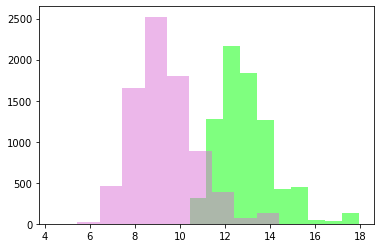

DescribeResult(nobs=7943, minmax=(10.425243620746409, 17.95076745494583), mean=12.964262913159738, variance=1.6042969355266035, skewness=1.0216294635376553, kurtosis=1.5061089413624433)
DescribeResult(nobs=7943, minmax=(4.437461341561982, 14.411557440914667), mean=9.32098262175452, variance=1.8931955478626266, skewness=0.7656852535477817, kurtosis=0.9718094330412086)


In [ ]:
#Plotting the log values of number sold per day of conventional and organic avocados and assessing for normality
plt.hist(conventional_data['Log of Number Sold Per Day'], alpha = .5,color='lime')
plt.hist(organic_data['Log of Number Sold Per Day'], alpha = .5,color='orchid')
plt.show()

print(stats.describe(conventional_data['Log of Number Sold Per Day']))
print(stats.describe(organic_data['Log of Number Sold Per Day']))

In [ ]:
#Since data is normally distributed, using t test to check for significance 
print(stats.ttest_ind(conventional_data['Log of Number Sold Per Day'],organic_data['Log of Number Sold Per Day']))

Ttest_indResult(statistic=173.62268608408885, pvalue=0.0)


In [ ]:
#95% confidence interval test and means of each variable
print(get_95_ci(conventional_data['Log of Number Sold Per Day'], organic_data['Log of Number Sold Per Day']))


print(organic_data['Log of Number Sold Per Day'].mean())
print(conventional_data['Log of Number Sold Per Day'].mean())

The difference in means at the 95% confidence interval (two-tail) is between -3.684408726474462 and -3.602151856336008.
9.320982621754494
12.964262913159729


In [ ]:
#The values given are all in log form in previous cell, so taking the inverse log to get exact value
confidence_interval_volume_1 = math.pow ( 10 , -3.693632556321322 )
confidence_interval_volume_2 = math.pow ( 10 , -3.6131433868990155 )
print(organic_data['Number Sold Per Day'].mean())
#mean_of_organic_volume = math.pow ( 10 , 9.48929987476525 )
#mean_of_conventional_volume = math.pow ( 10 , 13.142687846375418 )

print('The difference in means at the 95% confidence interval (two-tail) is between '  +str(confidence_interval_volume_1)+  ' and ' +str(confidence_interval_volume_2)+ ".")
#print(mean_of_organic_volume)
#print(mean_of_conventional_volume)

42694.92376683879
The difference in means at the 95% confidence interval (two-tail) is between 0.00020247315194748438 and 0.00024370060822951535.


NameError: ignored

In [ ]:
#Separating intial dataframe so that one dataframe includes small bag data and the other shows just large bag data of organic avocados 
#Discarding null values so that when log funtion is performed, only finite values exist 
small_bag_organic = organic_data[(organic_data['Small Bags'] > 0 )]
large_bag_organic = organic_data[(organic_data['Large Bags'] > 0 )]

In [ ]:
#Taking the log of small bag and large bag data so that values are easier to plot 
#Discarding all null vlaues so only finite values exist
small_bag_organic['Log of Small Bags']=np.log(small_bag_organic['Small Bags'])

large_bag_organic['Log of Large Bags']=np.log(large_bag_organic['Large Bags'])


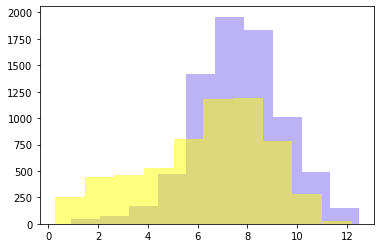

DescribeResult(nobs=7615, minmax=(0.9242589015233319, 12.490186660027268), mean=7.6760298750319915, variance=3.2137681830326894, skewness=-0.22170327496161626, kurtosis=0.4424702103254461)
DescribeResult(nobs=5970, minmax=(0.26236426446749106, 12.197724849431994), mean=6.314588992447152, variance=6.222261140997683, skewness=-0.4354055264810554, kurtosis=-0.6448035082720169)


In [ ]:
#Plotting total amount of small bags and large bags of organic avocados sold and assessing for normality
plt.hist(small_bag_organic['Log of Small Bags'], alpha = .5,color='mediumslateblue')
plt.hist(large_bag_organic['Log of Large Bags'], alpha = .5,color='yellow')
plt.show()

print(stats.describe(small_bag_organic['Log of Small Bags']))
print(stats.describe(large_bag_organic['Log of Large Bags']))

In [ ]:
#Since data is normally distributed, using t test to check for significance
print(stats.ttest_ind(small_bag_organic['Log of Small Bags'],large_bag_organic['Log of Large Bags']))

Ttest_indResult(statistic=36.97960324906804, pvalue=2.6438953624663675e-285)


In [ ]:
#95% confidence interval test and means of each variable
print(get_95_ci(small_bag_organic['Log of Small Bags'], large_bag_organic['Log of Large Bags']))

print(small_bag_organic['Log of Small Bags'].mean())
print(large_bag_organic['Log of Large Bags'].mean())

The difference in means at the 95% confidence interval (two-tail) is between -1.4364422251603375 and -1.2864395400093422.
7.676029875031979
6.314588992447139


In [ ]:
#The values given are all in log form in previous cell, so taking the inverse log to get exact value
confidence_interval_small_organic_1 = math.pow ( 10 , -1.4523793038123132 )
confidence_interval_small_organic_2 = math.pow ( 10 , -1.305490948797169)
mean_of_small_bag_organic = math.pow ( 10 , 8.01121489525302 )
mean_of_large_bag_organic = math.pow ( 10 , 6.63227976894828 )

print('The difference in means at the 95% confidence interval (two-tail) is between '  +str(confidence_interval_small_organic_1)+  ' and ' +str(confidence_interval_small_organic_2)+ ".")
print(mean_of_small_bag_organic)
print(mean_of_large_bag_organic)

The difference in means at the 95% confidence interval (two-tail) is between 0.03528748415842947 and 0.04948904249056678.
102615955.93871416
4288246.76783669


In [ ]:
#Separating intial dataframe so that one dataframe includes small bag data and the other shows just large bag data of conventional avocados 
#Discarding null values so that when log funtion is performed, only finite values exist
small_bag_conventional = conventional_data[(conventional_data['Small Bags'] > 0 )]
large_bag_conventional = conventional_data[(conventional_data['Large Bags'] > 0 )]

In [ ]:
#Taking the log of small bag and large bag data so that values are easier to plot 
#Discarding all null vlaues so only finite values exist
small_bag_conventional['Log of Small Bags']=np.log(small_bag_conventional['Small Bags'])

large_bag_conventional['Log of Large Bags']=np.log(large_bag_conventional['Large Bags'])

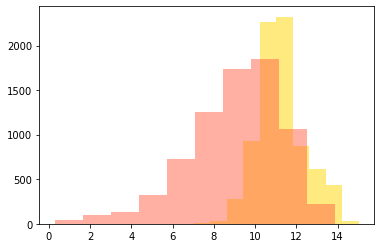

DescribeResult(nobs=7774, minmax=(7.020351553284526, 15.038865289339745), mean=11.26712341773537, variance=1.2969969102637091, skewness=0.4728799820374604, kurtosis=0.21767067526159378)
DescribeResult(nobs=7450, minmax=(0.28517894223366247, 13.863762615475522), mean=9.060922474360195, variance=5.166657287581617, skewness=-0.820132398806123, kurtosis=0.7991602737013417)


In [ ]:
#Plotting total amount of small bags and large bags of conventional avocados sold and assessing for normality
plt.hist(small_bag_conventional['Log of Small Bags'], alpha = .5,color='gold')
plt.hist(large_bag_conventional['Log of Large Bags'], alpha = .5,color='tomato')
plt.show()

print(stats.describe(small_bag_conventional['Log of Small Bags']))
print(stats.describe(large_bag_conventional['Log of Large Bags']))

In [ ]:
#Since data is normally distributed, using t test to check for significance
print(stats.ttest_ind(small_bag_conventional['Log of Small Bags'],large_bag_conventional['Log of Large Bags']))

Ttest_indResult(statistic=76.18016154969695, pvalue=0.0)


In [ ]:
#95% confidence interval test and means of each variable
print(get_95_ci(small_bag_conventional['Log of Small Bags'], large_bag_conventional['Log of Large Bags']))

print(small_bag_conventional['Log of Small Bags'].mean())
print(large_bag_conventional['Log of Large Bags'].mean())

The difference in means at the 95% confidence interval (two-tail) is between -2.263691082108222 and -2.148710804642141.
11.26712341773539
9.060922474360208


In [ ]:
#The values given are all in log form in previous cell, so taking the inverse log to get exact value
confidence_interval_small_conventional_1 = math.pow ( 10 , -2.167459903569464)
confidence_interval_small_conventional_2 = math.pow ( 10 , -2.0502740988249655)
mean_of_small_bag_conventional = math.pow ( 10 , 11.521512252390522 )
mean_of_large_bag_conventional = math.pow ( 10 , 9.412645251193307)

print('The difference in means at the 95% confidence interval (two-tail) is between '  +str(confidence_interval_small_conventional_1)+  ' and ' +str(confidence_interval_small_conventional_2)+ ".")
print(mean_of_small_bag_conventional)
print(mean_of_large_bag_conventional)

The difference in means at the 95% confidence interval (two-tail) is between 0.006800488279145057 and 0.00890688615168731.
332286159593.0505
2586099624.31789


In [ ]:
av_price_region = organic_data[[ 'AveragePrice', 'region']].groupby('region').mean()
av_price_region.sort_values(by=['AveragePrice'])

,AveragePrice
region,
Houston,1.270769
DallasFtWorth,1.324734
SouthCentral,1.333077
Denver,1.363195
Roanoke,1.399822
CincinnatiDayton,1.402899
Nashville,1.411302
Detroit,1.428225
Columbus,1.439290


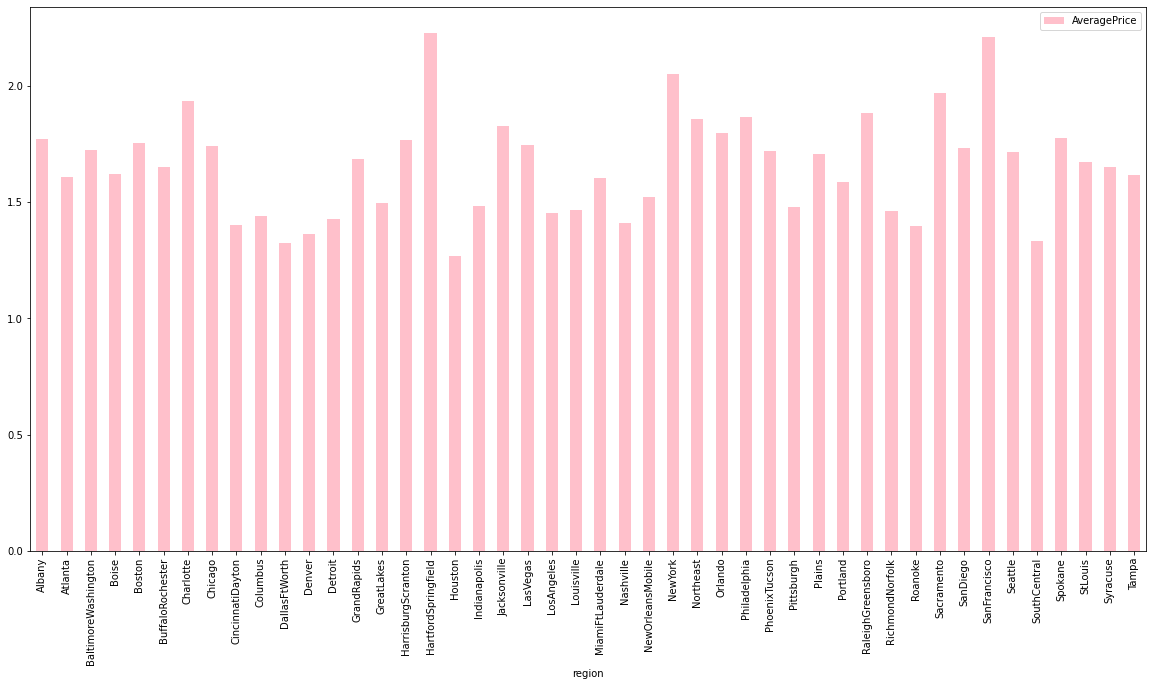

In [ ]:
av_price_region.plot(kind= 'bar', figsize=(20,10), color = 'pink')

# 5. Results
Hypothesis 1:
Based on a visual inspection and further inspection with kurtosis and skewness values, the average price of organic and conventional avocados sales are normally distributed and I proceeded with the t-test. Based on a p-value of 0.0, I rejected the null hypothesis that there is no significant difference in means of the average price.

The 95% confidence interval suggests that the difference in the average prices between organic and conventional avocados is between -0.0083 and 0.0083 USD. The mean of the average price of conventional avocados is 1.16 USD and the mean of average price of organic avocados is 1.65 USD.

Hypothesis 2:
Based on a visual inspection and further inspection with kurtosis and skewness values, the total number of organic avocados and conventional avocados sold per day are normally distributed and I proceeded with the t-test. Based on a p-value of 0.0, I rejected the null hypothesis that there is no significant difference in means of the total number of organic avocados and conventional avocados sold per day.

The 95% confidence interval suggests that the difference in the total number of avocados sold per day between organic and conventional avocados is between 0.00020 and 0.00024 avocados. The mean of total number of organic avocados sold per day is 3085317587 avocados and the mean of total number of conventional avocados sold per day is 13889539474173 avocados. 

Hypothesis 3
Based on a visual inspection and further inspection with kurtosis and skewness values, the total number of small bags of organic avocados sold per day and large bag of organic avocados sold per day are normally distributed and I proceeded with the t-test. Based on a p-value of 4.710454972242826e-278, I rejected the null hypothesis that there is no significant difference in means of the total number of small bags of organic avocados sold per day and large bag of organic avocados sold per day.

The 95% confidence interval suggests that the difference in the total number of small bags of organic avocados sold per day and large bag of organic avocados sold per day is between 0.035 and 0.050.
The mean of total number of small bags of organic avocados sold per day is 102615956 bags and the mean of total number of large bag of organic avocados sold per day is 4288247 bags. 

Hypothesis 4
Based on a visual inspection and further inspection with kurtosis and skewness values, the total number of small bags of conventional avocados sold per day and large bag of conventional avocados sold per day are normally distributed and I proceeded with the t-test. Based on a p-value of 0.0, I rejected the null hypothesis that there is no significant difference in means of the total number of small bags of conventional avocados sold per day and large bag of conventional avocados sold per day.

The 95% confidence interval suggests that the difference in the total number of small bags of conventional avocados sold per day and large bag of conventional avocados sold per day is between 0.0068 and 0.0089.
The mean of total number of small bags of conventional avocados sold per day is 332286159593 bags and the mean of total number of large bag of conventional avocados sold per day is 2586099624 bags. 


# 6. Discussion and recommendation
Upon analysis, it can be concluded that there is a signficant difference betweeen the average price of organic Hass avocados and conventional Hass avocados from 3rd Janurary 2015 to March 24th 2018 across the USA, with the mean average price of organic Hass avocados being higher. In addition there was a significant difference in the total number of organic and conventional Hass avocados sold per day from 3rd Janurary 2015 to March 24th 2018 across the USA, with more conventional Hass avocados sold than organic ones. In addition, there was a significant difference between the number of small bags of organic Hass avocados and large bags of organic Hass avocados from 3rd Janurary 2015 to March 24th 2018 across the USA, with more small bags sold. Lastly, there was a significant difference between the number of the number of small bags of conventional Hass avocados and large bags of conventional Hass avocados from 3rd Janurary 2015 to March 24th 2018 across the USA, with more small bags sold. 

This data is useful to both the consumer and companies. This data can help companies recognize how to perhaps package their product (ie. large vs small bags) and also can show them what type of avocado crop need they need to harvest more (conventional vs. organic) based on consumer purchases. This can also be helpful for the consumer to see how much avocados cost on average and perhaps when would be the best time of year to purchase avocados. Since the avocado mania is still going strong, this dataset provides interesting insight into the sale and production of avocados in the USA. 